In [33]:
import mib_v2 as mb
import matplotlib.pyplot as plt
import time

# Problema de prueba

## Planteamiento
Genarar una grafica del rendimiento del motor de inferencia con problema pequeño y con tres eventon con distribuciones uniformes, donde su cardinalidad de los tres va de uno a cien.


## Variables
A = \{0, 2, ..., n-1\}

B = \{0, 2, ..., n-1\}

C = \{0, 2, ..., n-1\}

## Modelo del problema
$P(ABC) = P(A)P(B|A)P(C|AB)$.

In [34]:
n = 200
timesM = []
timesC = []
for i in range(n):
    Events = set([x for x in range(i+1)])
    
    # Generación de distribuciones de probabilidad (Distribuciones uniformes).
    dA = {}
    dB_A = {}
    dC_AB = {}
    value = 1 / (i+1)
    for x in range(i+1):
        dA[x] = value
        dB_A[(x,)] = {}
        for y in range(i+1):
            dB_A[(x,)][y] = value
            dC_AB[(x,y)] = {}
            for z in range(i+1):
                dC_AB[(x,y)][z] = value
    
    # Variables para el motor de inferencia.
    A = mb.Var(Events)
    PA = mb.Distrib(A,dA)
    B = mb.Var(Events)
    PB_A = mb.CondDistrib(B,[A],dB_A)
    C = mb.Var(Events)
    PC_AB = mb.CondDistrib(C,[A,B],dC_AB)
    
    # Probabilidad conjunta (modelo)
    PABC = mb.JointDistrib([A,B,C], [PA, PB_A, PC_AB])

    # Motor de inferencia
    mib = mb.Mib(PABC)
    
    # Inferencia de una marginal
    inicio = time.time()
    PB = mib.Marginal_inference(B)
    fin = time.time()
    tiempo_ejecucion = fin - inicio
    timesM.append(tiempo_ejecucion)
    
    # Inferencia de una condicional dada observaciones
    inicio = time.time()
    PA_BC = mib.Cond_inference(A, set([B,C]), [0,0])
    fin = time.time()
    tiempo_ejecucion = fin - inicio
    timesC.append(tiempo_ejecucion)

In [37]:
xn = [i+1 for i in range(n)]
x10 = []
timesM10 = []
timesC10 = []
for i in range(20):
    x10.append(i*10)
    timesM10.append(timesM[i*10])
    timesC10.append(timesC[i*10])

### Timepo de inferencia de A en P(A)

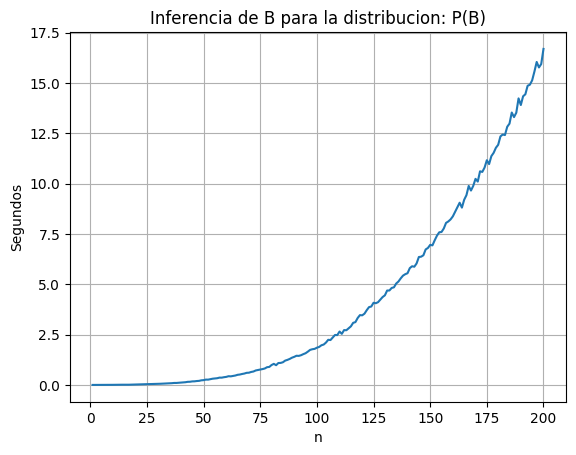

In [38]:
fig, ax = plt.subplots()
ax.plot(xn, timesM)
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de B para la distribucion: P(B)')
ax.grid()
plt.show()

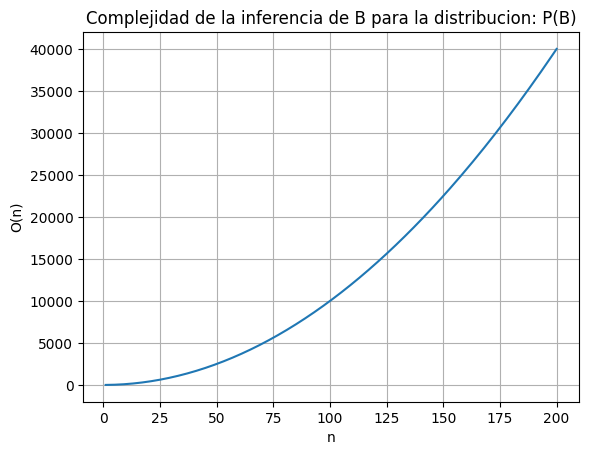

In [39]:
O = []
for i in range(n):
    O.append((i+1)**2)
fig, ax = plt.subplots()
ax.plot(xn, O)
ax.set_xlabel("n")
ax.set_ylabel("O(n)")
ax.set_title('Complejidad de la inferencia de B para la distribucion: P(B)')
ax.grid()
plt.show()

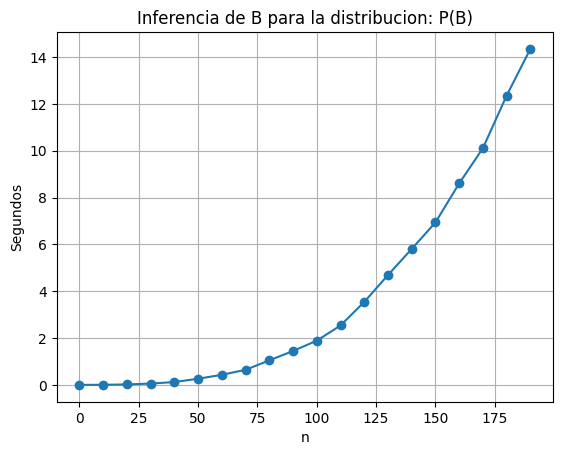

In [40]:
fig, ax = plt.subplots()
ax.plot(x10, timesM10, marker = 'o')
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de B para la distribucion: P(B)')
ax.grid()
plt.show()

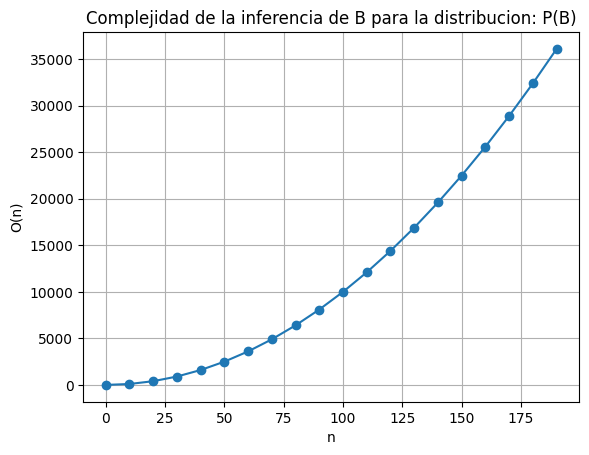

In [41]:
O = []
for i in range(20):
    O.append((i*10)**2)
fig, ax = plt.subplots()
ax.plot(x10, O, marker = 'o')
ax.set_xlabel("n")
ax.set_ylabel("O(n)")
ax.set_title('Complejidad de la inferencia de B para la distribucion: P(B)')
ax.grid()
plt.show()

### Timepo de inferencia de A en P(A|BC)

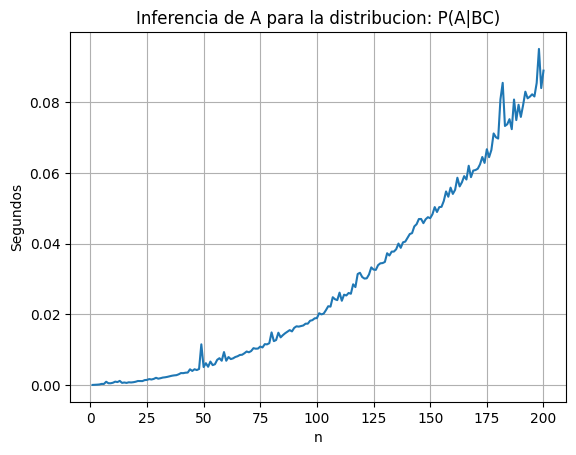

In [42]:
fig, ax = plt.subplots()
ax.plot(xn, timesC)
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de A para la distribucion: P(A|BC)')
ax.grid()
plt.show()

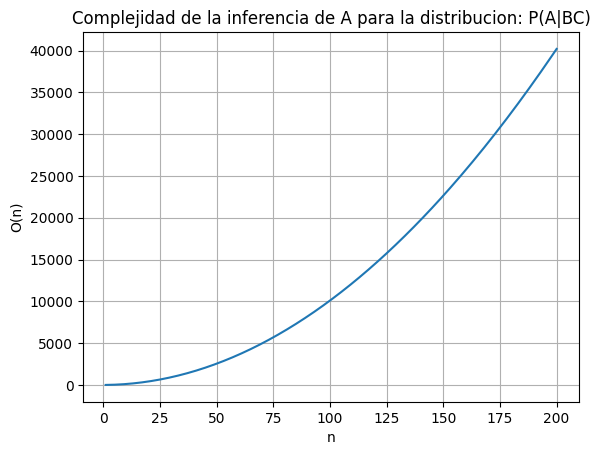

In [43]:
O = []
for i in range(n):
    O.append((i+1)**2 + (i+1))
fig, ax = plt.subplots()
ax.plot(xn, O)
ax.set_xlabel("n")
ax.set_ylabel("O(n)")
ax.set_title('Complejidad de la inferencia de A para la distribucion: P(A|BC)')
ax.grid()
plt.show()

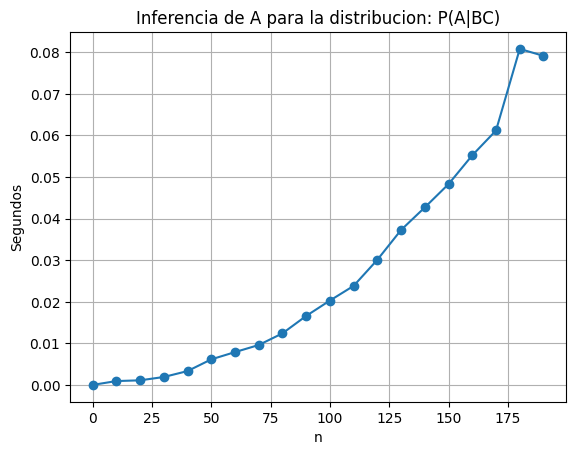

In [44]:
fig, ax = plt.subplots()
ax.plot(x10, timesC10, marker = 'o')
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de A para la distribucion: P(A|BC)')
ax.grid()
plt.show()

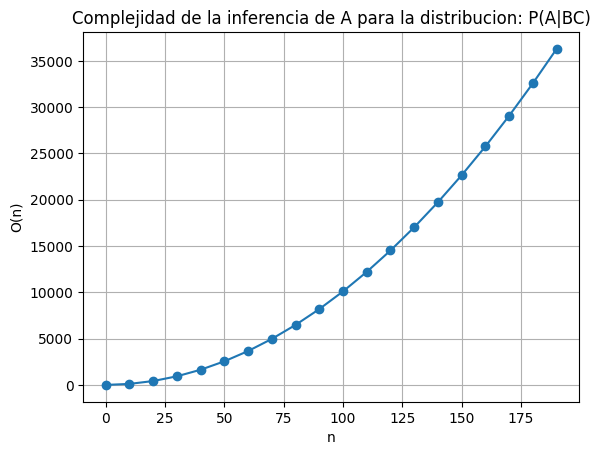

In [45]:
O = []
for i in range(20):
    O.append((i*10) + (i*10)**2)
fig, ax = plt.subplots()
ax.plot(x10, O, marker = 'o')
ax.set_xlabel("n")
ax.set_ylabel("O(n)")
ax.set_title('Complejidad de la inferencia de A para la distribucion: P(A|BC)')
ax.grid()
plt.show()